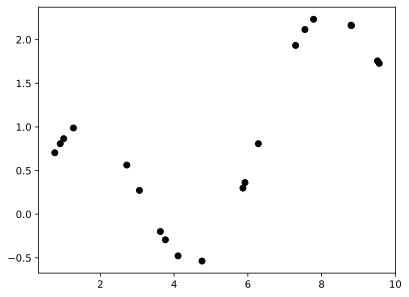

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = "svg"


def true_function(X):
    return np.sin(X) + (X / 7) ** 2


X = np.random.rand(20) * 10
y = true_function(X)

plt.plot(X, y, "ok")

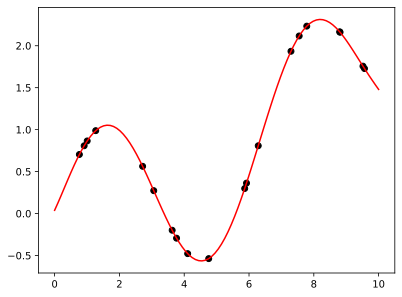

In [2]:
from mini_gpr.full import GPR
from mini_gpr.kernels import RBF

model = GPR(kernel=RBF(sigma=1.0))

model.fit(X, y)

xx = np.linspace(0, 10, 100)
yy = model(xx)

plt.plot(X, y, "ok")
plt.plot(xx, yy, "-r")

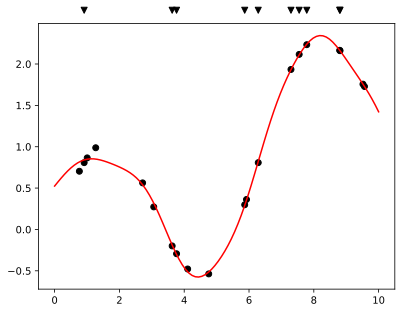

In [13]:
from mini_gpr.sparse import SparseGPR

model = SparseGPR(kernel=RBF(sigma=1.0))

model.fit(X, y)

xx = np.linspace(0, 10, 100)
yy = model(xx)

plt.plot(X, y, "ok")
plt.plot(xx, yy, "-r")

plt.plot(
    model.points,
    [1.05] * len(model.points),
    "vk",
    transform=plt.gca().get_xaxis_transform(),
    clip_on=False,
)

/Users/john.gardner/mini-gpr/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


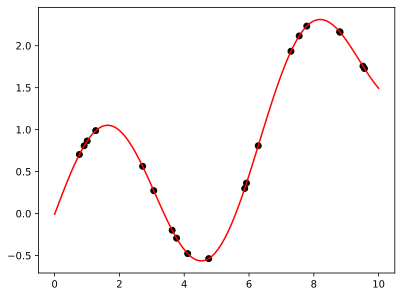

In [17]:
# create a pipeline model that first normalises the data and then fits a gpr model
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline(
    [("scaler", StandardScaler()), ("gpr", GPR(kernel=RBF(sigma=1.0)))]
)

pipeline.fit(X[:, None], y)

xx = np.linspace(0, 10, 100)
yy = pipeline.predict(xx[:, None])

plt.plot(X, y, "ok")
plt.plot(xx, yy, "-r")